In [1]:
import pandas as pd
import numpy as np
import cv2 
import skimage
from skimage import io, transform, draw
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [2]:
testset=np.array(pd.read_csv("/home/hahnz/dataset.csv",header=None).as_matrix())

In [6]:
def Preprocess(dataset,re_img_size=(256,256)):
    img_set=np.zeros([len(dataset),re_img_size[0],re_img_size[1],3])
    coor_set=np.zeros([len(dataset),14,2])
    
    for i in range(len(dataset)):
        img=skimage.io.imread(dataset[i][0])
        
        img_set[i]=skimage.transform.resize(img,(re_img_size[0],re_img_size[1],3))
        coor_set[i]=dataset[i][1:].reshape((14,2))
        
        for j in range(14):
            if coor_set[i][j][0]==-1: pass
            else: coor_set[i][j][0]=coor_set[i][j][0]*(re_img_size[0]/img.shape[1])
            if coor_set[i][j][1]==-1: pass
            else: coor_set[i][j][1]=coor_set[i][j][1]*(re_img_size[0],re_img_size[1]/img.shape[0])
    return img_set, coor_set

In [4]:
def markJoints(img, joints):  
    circSize=5
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(14):
        x = int(joints[i,0])
        y = int(joints[i,1])
        if x!=-1: 
            rr, cc = skimage.draw.circle(y, x, circSize) 
            skimage.draw.set_color(img, (rr, cc), (1,0,0)) 
            cv2.putText(img, str(i+1), (x,y), font, 0.5, (0.5,0.5,0.5), 2, cv2.LINE_AA)
    return img

In [7]:
picpic, coco =Preprocess(dataset=testset)

TypeError: 'list' object cannot be interpreted as an integer

In [9]:
%mkdir p_img p_with_coors_img
for i in range(len(picpic)):
    skimage.io.imsave("./p_img/p-img_"+str(i)+".jpg",picpic[i]) 
    skimage.io.imsave("./p_with_coors_img/p-img_"+str(i)+".jpg",markJoints(picpic[i],coco[i]))

/home/hahnz/.local/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [6]:
testimg=markJoints(picpic[1],coco[1])

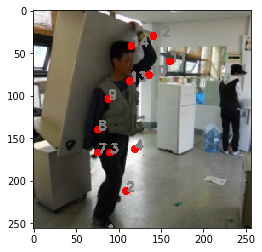

In [7]:
num=9
imgimg=copy.copy(picpic[60])
cococo=copy.copy(coco[60])
testimg=markJoints(imgimg,cococo)
plt.imshow(testimg)

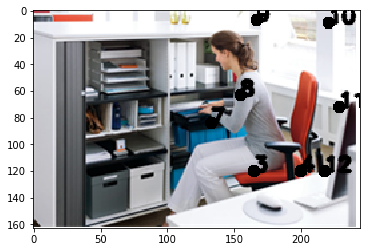

In [64]:
imgimg=skimage.io.imread(testset[60][0])
cococo=testset[80][1:].reshape(14,2)
testimg=markJoints(imgimg,cococo)
plt.imshow(testimg)